In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pymysql
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import getpass  # to get the password without showing the input
password = getpass.getpass()

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

import warnings
warnings.filterwarnings('ignore')

········


In [2]:
import imblearn

In [3]:
#Read the data into a Pandas dataframe.

In [4]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [6]:
query = '''  
        select r.rental_id, r.rental_date,f.*, fc.category_id, fa.actor_id,
case when month(r.rental_date) =2 and year(r.rental_date) = 2006
then '1'
else '0'
end as last_month_rented
from rental r
left join inventory i on r.inventory_id = i.inventory_id
left join film f on i.film_id = f.film_id
left join film_category fc on f.film_id = fc.film_id
left join film_actor fa on fc.film_id = fa.film_id
'''

In [7]:
query1 =''' select f.film_id, f.title,f.release_year,f.language_id,f.original_language_id,f.rental_duration,f.rental_rate,f.length,f.replacement_cost,f.rating,f.special_features,
	r.rental_id,r.rental_date,r.inventory_id,r.customer_id,r.return_date,r.staff_id,i.store_id,
	case when month(r.rental_date) = 2 AND YEAR(r.rental_date) = 2006 
            THEN 'True' 
            ELSE 'False' 
       END AS rented_last_month
from sakila.inventory i
join sakila.film f on i.film_id = f.film_id
join sakila.rental r on i.inventory_id = r.inventory_id'''

In [8]:
data =pd.read_sql_query(query1,engine)

In [9]:
data

,film_id,title,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id,rented_last_month
0,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4863,2005-07-08 19:03:15,1,431,2005-07-11 21:29:15,2,1,False
1,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",11433,2005-08-02 20:13:10,1,518,2005-08-11 21:35:10,1,1,False
2,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",14714,2005-08-21 21:27:43,1,279,2005-08-30 22:26:43,1,1,False
3,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",16050,2023-06-13 20:10:17,1,130,NaT,1,1,False
4,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",972,2005-05-30 20:21:07,2,411,2005-06-06 00:36:07,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",711,2005-05-29 03:49:03,4581,215,2005-05-31 08:29:03,2,2,False
16041,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",1493,2005-06-15 21:50:32,4581,235,2005-06-17 01:02:32,2,2,False
16042,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",6712,2005-07-12 13:24:47,4581,226,2005-07-20 09:35:47,2,2,False
16043,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",9701,2005-07-31 07:32:21,4581,401,2005-08-01 05:07:21,2,2,False


In [10]:
drop =['title','original_language_id','special_features']
for d in drop:
    data=data.drop(d, axis=1)

In [11]:
data.shape


(16045, 16)

In [12]:
data.dtypes

film_id                       int64
release_year                  int64
language_id                   int64
rental_duration               int64
rental_rate                 float64
length                        int64
replacement_cost            float64
rating                       object
rental_id                     int64
rental_date          datetime64[ns]
inventory_id                  int64
customer_id                   int64
return_date          datetime64[ns]
staff_id                      int64
store_id                      int64
rented_last_month            object
dtype: object

In [13]:
data.isna().sum()

film_id                0
release_year           0
language_id            0
rental_duration        0
rental_rate            0
length                 0
replacement_cost       0
rating                 0
rental_id              0
rental_date            0
inventory_id           0
customer_id            0
return_date          184
staff_id               0
store_id               0
rented_last_month      0
dtype: int64

In [14]:
data.drop('return_date',axis=1)


,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,rental_id,rental_date,inventory_id,customer_id,staff_id,store_id,rented_last_month
0,1,2006,1,6,0.99,86,20.99,PG,4863,2005-07-08 19:03:15,1,431,2,1,False
1,1,2006,1,6,0.99,86,20.99,PG,11433,2005-08-02 20:13:10,1,518,1,1,False
2,1,2006,1,6,0.99,86,20.99,PG,14714,2005-08-21 21:27:43,1,279,1,1,False
3,1,2006,1,6,0.99,86,20.99,PG,16050,2023-06-13 20:10:17,1,130,1,1,False
4,1,2006,1,6,0.99,86,20.99,PG,972,2005-05-30 20:21:07,2,411,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,1000,2006,1,3,4.99,50,18.99,NC-17,711,2005-05-29 03:49:03,4581,215,2,2,False
16041,1000,2006,1,3,4.99,50,18.99,NC-17,1493,2005-06-15 21:50:32,4581,235,2,2,False
16042,1000,2006,1,3,4.99,50,18.99,NC-17,6712,2005-07-12 13:24:47,4581,226,2,2,False
16043,1000,2006,1,3,4.99,50,18.99,NC-17,9701,2005-07-31 07:32:21,4581,401,2,2,False


In [15]:
data.describe()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,inventory_id,customer_id,staff_id,store_id
count,16045.000000,16045.0,16045.0,16045.000000,16045.000000,16045.000000,16045.000000,16045.000000,16045.000000,16045.000000,16045.000000,16045.000000
mean,501.077719,2006.0,1.0,4.935556,2.942509,114.969274,20.215491,8025.871611,2291.699782,297.132752,1.498847,1.506139
std,288.531551,0.0,0.0,1.401671,1.649698,40.101750,6.081585,4633.066013,1322.293121,172.452810,0.500014,0.499978
min,1.000000,2006.0,1.0,3.000000,0.990000,46.000000,9.990000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,255.000000,2006.0,1.0,4.000000,0.990000,81.000000,14.990000,4014.000000,1154.000000,148.000000,1.000000,1.000000
50%,496.000000,2006.0,1.0,5.000000,2.990000,114.000000,20.990000,8026.000000,2291.000000,296.000000,1.000000,2.000000
75%,753.000000,2006.0,1.0,6.000000,4.990000,148.000000,25.990000,12038.000000,3433.000000,446.000000,2.000000,2.000000
max,1000.000000,2006.0,1.0,7.000000,4.990000,185.000000,29.990000,16050.000000,4581.000000,599.000000,2.000000,2.000000


In [16]:
data

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id,rented_last_month
0,1,2006,1,6,0.99,86,20.99,PG,4863,2005-07-08 19:03:15,1,431,2005-07-11 21:29:15,2,1,False
1,1,2006,1,6,0.99,86,20.99,PG,11433,2005-08-02 20:13:10,1,518,2005-08-11 21:35:10,1,1,False
2,1,2006,1,6,0.99,86,20.99,PG,14714,2005-08-21 21:27:43,1,279,2005-08-30 22:26:43,1,1,False
3,1,2006,1,6,0.99,86,20.99,PG,16050,2023-06-13 20:10:17,1,130,NaT,1,1,False
4,1,2006,1,6,0.99,86,20.99,PG,972,2005-05-30 20:21:07,2,411,2005-06-06 00:36:07,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,1000,2006,1,3,4.99,50,18.99,NC-17,711,2005-05-29 03:49:03,4581,215,2005-05-31 08:29:03,2,2,False
16041,1000,2006,1,3,4.99,50,18.99,NC-17,1493,2005-06-15 21:50:32,4581,235,2005-06-17 01:02:32,2,2,False
16042,1000,2006,1,3,4.99,50,18.99,NC-17,6712,2005-07-12 13:24:47,4581,226,2005-07-20 09:35:47,2,2,False
16043,1000,2006,1,3,4.99,50,18.99,NC-17,9701,2005-07-31 07:32:21,4581,401,2005-08-01 05:07:21,2,2,False


In [17]:
data.columns


Index(['film_id', 'release_year', 'language_id', 'rental_duration',
       'rental_rate', 'length', 'replacement_cost', 'rating', 'rental_id',
       'rental_date', 'inventory_id', 'customer_id', 'return_date', 'staff_id',
       'store_id', 'rented_last_month'],
      dtype='object')

In [18]:
for c in data.columns:
    print(c)
    print(data[c].value_counts())
    print()

film_id
103    34
738    33
489    32
382    32
331    32
       ..
362     5
310     5
904     4
584     4
400     4
Name: film_id, Length: 958, dtype: int64

release_year
2006    16045
Name: release_year, dtype: int64

language_id
1    16045
Name: language_id, dtype: int64

rental_duration
3    3412
6    3393
4    3251
5    3165
7    2824
Name: rental_duration, dtype: int64

rental_rate
0.99    5653
4.99    5272
2.99    5120
Name: rental_rate, dtype: int64

length
85     305
112    243
84     216
178    209
92     196
      ... 
72      42
94      42
55      42
66      22
96      20
Name: length, Length: 140, dtype: int64

replacement_cost
22.99    1044
27.99     958
21.99     912
29.99     868
20.99     864
12.99     864
14.99     821
13.99     803
11.99     749
25.99     740
26.99     737
10.99     720
28.99     716
18.99     696
17.99     691
23.99     690
9.99      684
19.99     657
16.99     639
24.99     633
15.99     559
Name: replacement_cost, dtype: int64

rating
PG-13    35

In [19]:
drop =['rental_id','rental_date','return_date','release_year','language_id']
for d in drop:
    data=data.drop(d, axis=1)


In [20]:
data

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,customer_id,staff_id,store_id,rented_last_month
0,1,6,0.99,86,20.99,PG,1,431,2,1,False
1,1,6,0.99,86,20.99,PG,1,518,1,1,False
2,1,6,0.99,86,20.99,PG,1,279,1,1,False
3,1,6,0.99,86,20.99,PG,1,130,1,1,False
4,1,6,0.99,86,20.99,PG,2,411,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
16040,1000,3,4.99,50,18.99,NC-17,4581,215,2,2,False
16041,1000,3,4.99,50,18.99,NC-17,4581,235,2,2,False
16042,1000,3,4.99,50,18.99,NC-17,4581,226,2,2,False
16043,1000,3,4.99,50,18.99,NC-17,4581,401,2,2,False


In [21]:
data['rental_duration'] = data['rental_duration'].astype('object')


In [22]:
data

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,customer_id,staff_id,store_id,rented_last_month
0,1,6,0.99,86,20.99,PG,1,431,2,1,False
1,1,6,0.99,86,20.99,PG,1,518,1,1,False
2,1,6,0.99,86,20.99,PG,1,279,1,1,False
3,1,6,0.99,86,20.99,PG,1,130,1,1,False
4,1,6,0.99,86,20.99,PG,2,411,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
16040,1000,3,4.99,50,18.99,NC-17,4581,215,2,2,False
16041,1000,3,4.99,50,18.99,NC-17,4581,235,2,2,False
16042,1000,3,4.99,50,18.99,NC-17,4581,226,2,2,False
16043,1000,3,4.99,50,18.99,NC-17,4581,401,2,2,False


In [23]:
data = data.set_index('film_id')


In [24]:
data

,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,customer_id,staff_id,store_id,rented_last_month
film_id,,,,,,,,,,
1,6,0.99,86,20.99,PG,1,431,2,1,False
1,6,0.99,86,20.99,PG,1,518,1,1,False
1,6,0.99,86,20.99,PG,1,279,1,1,False
1,6,0.99,86,20.99,PG,1,130,1,1,False
1,6,0.99,86,20.99,PG,2,411,1,1,False
...,...,...,...,...,...,...,...,...,...,...
1000,3,4.99,50,18.99,NC-17,4581,215,2,2,False
1000,3,4.99,50,18.99,NC-17,4581,235,2,2,False
1000,3,4.99,50,18.99,NC-17,4581,226,2,2,False


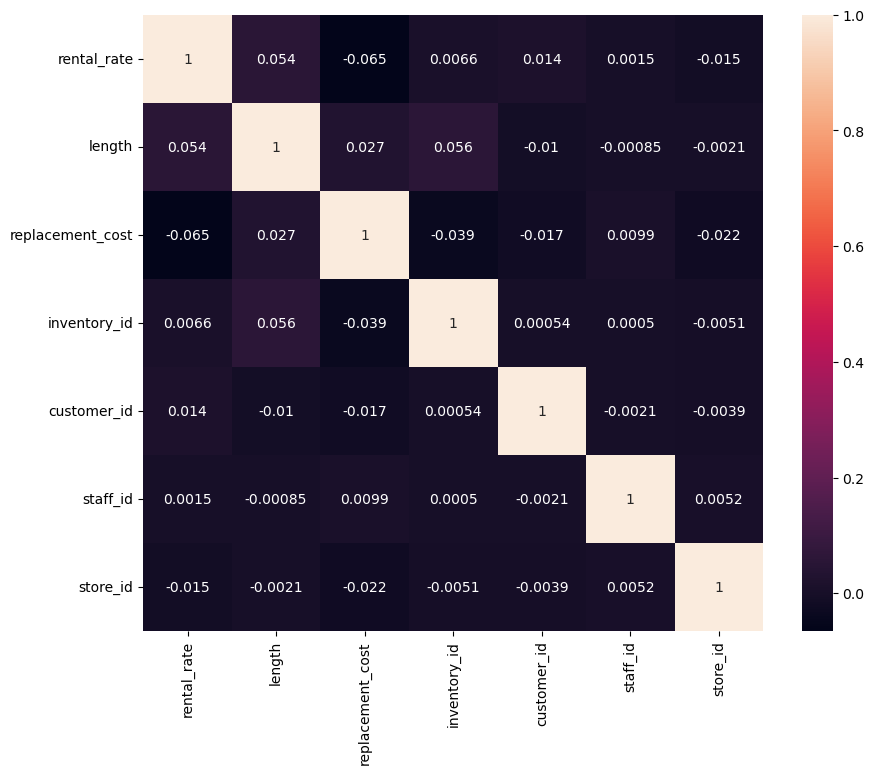

In [25]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [27]:
X = pd.get_dummies(data.drop('rented_last_month', axis=1))
y = data['rented_last_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)